In [1]:
#%pip install h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from dataHandling import CustomDataset, getDataAsTensors, micro_path, test_path, val_path, train_path
import torch
from torch.utils.data import random_split

In [3]:
_testImgs, _testLabels, _testMax_val = getDataAsTensors(val_path)#Using validation set as test set as we split the training set into training and validation sets
test_dataset = CustomDataset(_testImgs, _testLabels)

imgs, labels, max_val = getDataAsTensors(train_path)
train_size = int(0.8 * len(imgs))
validation_size = len(imgs) - train_size
train_dataset, validation_dataset = random_split(CustomDataset(imgs, labels), [train_size, validation_size])

print(len(train_dataset))

Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
157080
Overall Max Pixel Value: 275.4703674316406
Overall Min Pixel Value: 0.0
imgs: torch.Size([157080, 25, 25]) , signals:  torch.Size([157080])
Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
628320
Overall Max Pixel Value: 284.6765441894531
Overall Min Pixel Value: 0.0
imgs: torch.Size([628320, 25, 25]) , signals:  torch.Size([628320])
502656


In [4]:
batch_size = 256
classes = ('general', 'W-boson')

trainDataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
validationDataLoader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)
testDataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)


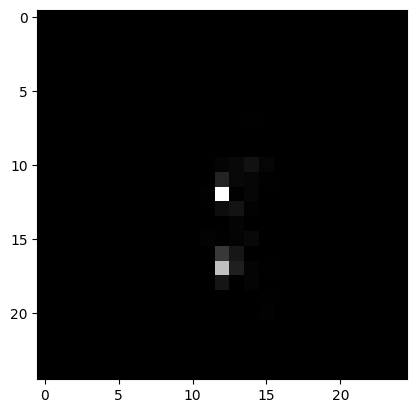

W-boson W-boson general W-boson W-boson W-boson general W-boson W-boson W-boson W-boson general W-boson general W-boson W-boson W-boson general W-boson general W-boson W-boson general general general general W-boson W-boson W-boson general general general W-boson W-boson W-boson W-boson general W-boson general general general W-boson W-boson general general W-boson W-boson W-boson general W-boson general general W-boson W-boson general W-boson W-boson general general general W-boson W-boson W-boson general general W-boson general W-boson general W-boson W-boson W-boson general W-boson W-boson general general general W-boson W-boson general W-boson W-boson W-boson general W-boson W-boson W-boson general general general general general W-boson W-boson W-boson general W-boson W-boson general W-boson general general W-boson general W-boson general W-boson W-boson W-boson W-boson general general W-boson W-boson W-boson general W-boson W-boson W-boson general W-boson general general general 

In [5]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')  # Display the first channel of the image grid and use grayscale colormap
    plt.show()

# Get some random training images
dataiter = iter(trainDataLoader)
images, labels = next(dataiter)
# Show images
imshow(images[0])
# Print labels
print(' '.join(f'{classes[int(labels[j].item())]:5s}' for j in range(batch_size)))

In [6]:
from models import CNN

cnn = CNN()
#cnn.train_model(trainDataLoader)
cnn.load_state_dict(torch.load('model.pth'))
cnn.eval()  # Set the model to evaluation mode

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (fc1): Linear(in_features=144, out_features=120, bias=True)
  (dropout4): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (dropout5): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=84, out_features=1, bias=True)
  (criterion): BCEWithLogitsLoss()
)

In [7]:
torch.save(cnn.state_dict(), 'model.pth')

In [8]:
_preds, _preds_01, _labels = cnn.predictOnData(validationDataLoader)

Accuracy of the network on the test images: 79.89 %


In [9]:
test_preds, test_preds_01, test_labels = cnn.predictOnData(testDataLoader)

Accuracy of the network on the test images: 79.89 %


In [18]:
from monteCarlo import MonteCarloDropoutModel

MCDM = MonteCarloDropoutModel(model=cnn,
                                data_loader=validationDataLoader,
                                n_samples=validation_size, forward_passes=100, adjust_dropout=0.1)#Default forward_passes=20, n_classes=1

mean, std, mutual_info, dropout_predictions = MCDM.get_monte_carlo_predictions()

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


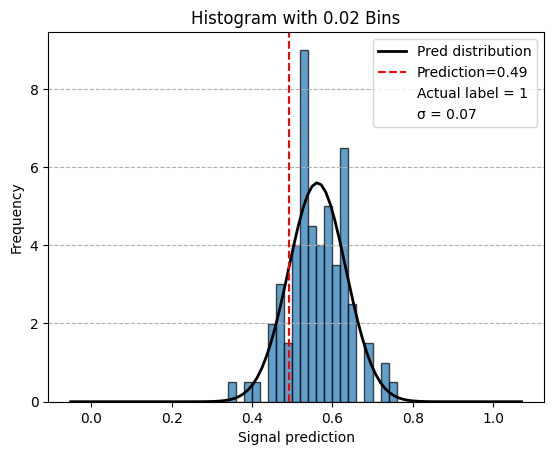

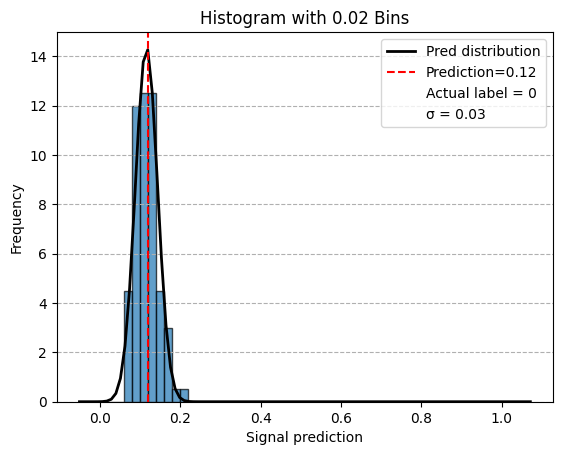

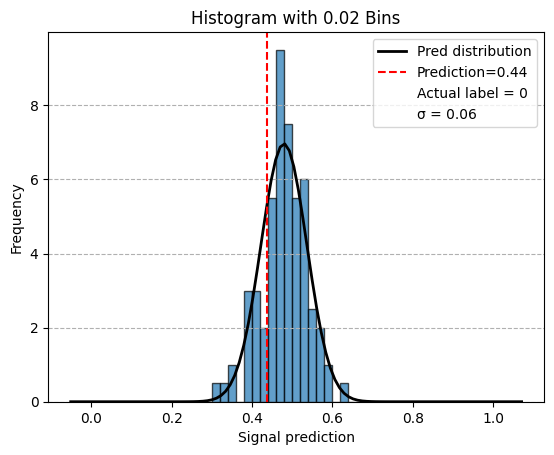

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histogram(values, label, threshold=0.02, original_prediction=None, std=None, show_legend=True, show_curve=True):
    # Ensure all values are between 0 and 1
    filtered_values = [v for v in values if 0 <= v <= 1]

    # Set the bin edges based on the given threshold
    bins = [i*threshold for i in range(int(1/threshold) + 2)]  # +2 to include the upper bound

    # Calculate the histogram data without plotting
    y, x, _ = plt.hist(filtered_values, bins=bins, edgecolor='black', alpha=0.7, density=True)
    plt.xlabel('Signal prediction')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {threshold} Bins')
    plt.grid(axis='y', linestyle='--')

    # Plot Gaussian distribution if show_curve is True
    if show_curve:
        mean = np.mean(filtered_values)
        std = std or np.std(filtered_values)  # Use provided std or calculate if not provided
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2, label="Pred distribution")

    # Add original prediction line if provided
    if original_prediction is not None:
        plt.axvline(x=original_prediction, color='red', linestyle='--', label=f'Prediction={original_prediction:.2f}')

    # Add legend if show_legend is True
    if show_legend:
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        if label is not None:
            current_labels.append(f'Actual label = {label:.0f}')
            current_handles.append(plt.Rectangle((0, 0), 0, 0, fc="white", fill=False, edgecolor='none', linewidth=0))
        if show_curve and std is not None:
            current_labels.append(f'σ = {std:.2f}')
            current_handles.append(plt.Rectangle((0, 0), 0, 0, fc="white", fill=False, edgecolor='none', linewidth=0))
        plt.legend(handles=current_handles, labels=current_labels)

    plt.show()

# Example
indexToInspect = 21
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])
indexToInspect = 211
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])
indexToInspect= 91377
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])

In [12]:
def find_matching_indices(list2, list1):
    """Find indices where value in list1 is <0.05 and value in list2 is between 0.4 and 0.5."""
    matching_indices = []
    
    # Iterate over both lists simultaneously
    for idx, (val1, val2) in enumerate(zip(list1, list2)):
        if val1 < 0.04 and 0.41 <= val2 <= 0.45:
            matching_indices.append(idx)
            
    return matching_indices
print(find_matching_indices(_preds, std))  # This should print [0, 2]

[239, 3265, 5096, 9766, 10770, 13123, 17147, 19489, 21321, 22131, 22177, 28108, 31390, 31716, 31990, 33171, 36080, 39629, 40998, 43675, 46999, 47451, 48559, 50956, 51749, 60849, 62151, 62618, 63870, 64586, 68936, 71756, 83397, 91253, 91377, 95780, 96955, 97790, 100775, 101836, 110297, 113078, 114542, 118742]


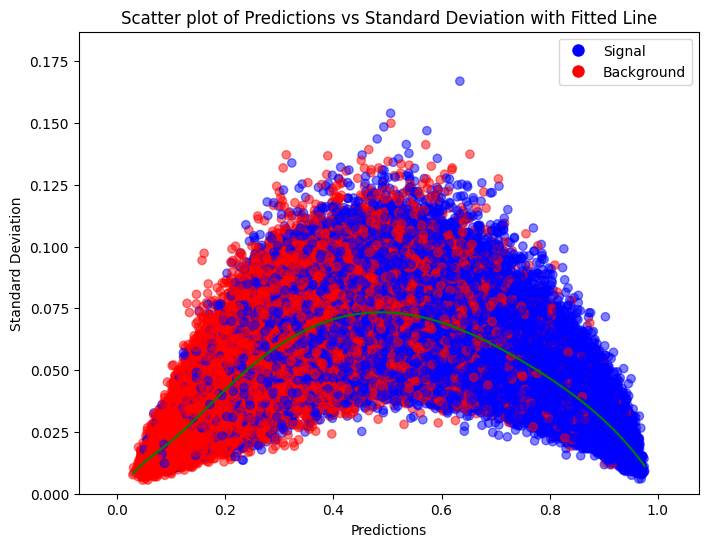

In [13]:
def scatter_plot(preds, std, labels, degree=2):
    if len(preds) != len(std) or len(preds) != len(labels):
        print("All lists should have the same length!")
        return
    
    # Create a list of colors based on the correctness of predictions
    colors = ['blue' if ( l == 1) else 'red' for p, l in zip(preds, labels)]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(preds, std, color=colors, alpha=0.5)
    
    # Fit a line to the data
    coefficients = np.polyfit(preds, std, degree)
    polynomial = np.poly1d(coefficients)
    
    # Generate y-values based on the fitted polynomial
    xs = np.linspace(min(preds), max(preds), 500)
    fitted_y = polynomial(xs)
    
    # Plot the fitted polynomial
    plt.plot(xs, fitted_y, color='green', label=f'Fitted Polynomial (Degree {degree})')
    
    # Create a custom legend
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Signal', markersize=10, markerfacecolor='blue')
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Background', markersize=10, markerfacecolor='red')
    plt.legend(handles=[blue_patch, red_patch])
    
    plt.xlabel("Predictions")
    plt.ylabel("Standard Deviation")
    plt.title("Scatter plot of Predictions vs Standard Deviation with Fitted Line")
    plt.xlim([min(preds)-0.1, max(preds)+0.1])  # assuming predictions are between 0 and 1
    plt.ylim([0, max(std)+0.02])
    plt.show()
    
scatter_plot(_preds, std, _labels, 12)  # Make sure you also provide the 'labels' list when calling the function

(125664,) torch.Size([256])


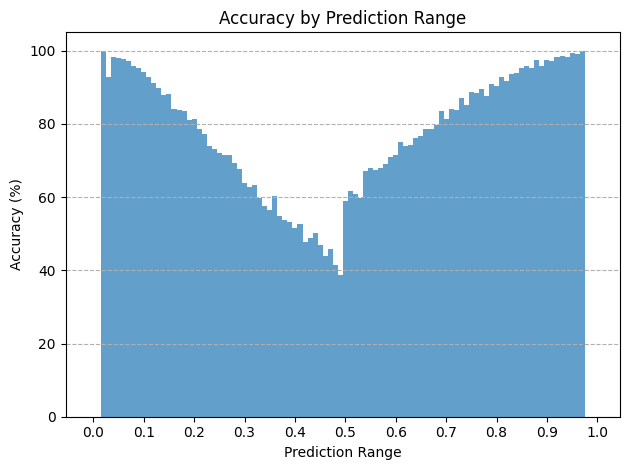

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_histogram(predictions, labels, bin_size=0.05):
    if len(predictions) != len(labels):
        print("Predictions and labels must have the same length!")
        return
    
    # Grouping the predictions in bins
    bins = np.arange(0, 1 + bin_size, bin_size)
    bin_indices = np.digitize(predictions, bins) - 1
    
    correct_counts = np.zeros_like(bins[:-1])
    total_counts = np.zeros_like(bins[:-1])
    
    for pred, label in zip(predictions, labels):
        bin_index = min(int(pred / bin_size), len(bins) - 2)  # Ensure it's within range
        if (pred > 0.5 and label == 1) or (pred <= 0.5 and label == 0):
            correct_counts[bin_index] += 1
        total_counts[bin_index] += 1
    
    # Calculating accuracy for each bin
    accuracies = np.divide(correct_counts, total_counts, out=np.zeros_like(correct_counts), where=total_counts!=0) * 100
    
    # Plotting the histogram
    plt.bar(bins[:-1], accuracies, width=bin_size, alpha=0.7)
    plt.xlabel('Prediction Range')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy by Prediction Range')
    plt.ylim(0, 105)  # To make the y-axis range from 0 to 105 for clarity
    plt.grid(axis='y', linestyle='--')

    # Set x-ticks every 0.1 and remove bin labels
    plt.xticks(np.arange(0, 1.1, 0.1))

    plt.tight_layout()
    plt.show()

# Sample usage (assuming _preds and _labels are defined somewhere in your code):
# print(_preds.shape, labels.shape)
# plot_accuracy_histogram(_preds, _labels, bin_size=0.005)



print(_preds.shape, labels.shape)
plot_accuracy_histogram(_preds, _labels, bin_size=0.01)


In [15]:
import sys
import torch.nn as nn


def gaussian_noise(img, mean=0.2, std=4):
    """Apply Gaussian noise to the image batch"""
    noisy_img = img.clone().detach()

    # Generate Gaussian noise for each image in the batch
    noise = torch.normal(mean, std, size=img.shape)

    # Add noise
    noisy_img += noise

    # Clip values to be between 0 and 275
    torch.clamp(noisy_img, 0, 275, out=noisy_img)

    return noisy_img


def get_gaussian_predictions(data_loader, forward_passes, model, n_classes, n_samples, _verb=False, mean=0, std=4):
    predictions_storage = np.empty((0, n_samples))
    sigmoid = nn.Sigmoid()

    for fp in range(forward_passes):
        predictions = np.empty((0,))
        model.eval()  # Ensure model is in eval mode
        verb = _verb

        for _, (image, label) in enumerate(data_loader):
            image = image.unsqueeze(1)
            label = label.float().unsqueeze(1)

            noisy_image = gaussian_noise(image, mean, std)
            label = label.float().unsqueeze(1)

            if verb:
                print("image shape", noisy_image.shape, ", fp_n=",fp)
                imshow(image[0].squeeze(0))
                imshow(noisy_image[0].squeeze(0))
                
                verb = False
                
            with torch.no_grad():
                output = model(noisy_image)
                output = sigmoid(output).squeeze(1)
                if verb:
                    print("output shape", output.shape, output[2])

            predictions = np.append(predictions, output.cpu().numpy())
            verb = False

        predictions_storage = np.vstack((predictions_storage, predictions))

    mean_val = np.mean(predictions_storage, axis=0)
    std_val = np.std(predictions_storage, axis=0)
    epsilon = sys.float_info.min

    entropy = -(mean_val * np.log(mean_val + epsilon) + (1 - mean_val) * np.log(1 - mean_val + epsilon))
    expected_entropy = -np.mean(predictions_storage * np.log(predictions_storage + epsilon) +
                                (1 - predictions_storage) * np.log(1 - predictions_storage + epsilon), axis=0)
    mutual_info = entropy - expected_entropy

    return mean_val, std_val, mutual_info, predictions_storage


In [16]:
gauss_mean, gauss_std, gauss_mutual_info, gauss_predictions = get_gaussian_predictions(data_loader=validationDataLoader,
                                forward_passes=50,
                                model=cnn,
                                n_classes=1,
                                _verb=False,
                                n_samples=validation_size, std=0.018)

KeyboardInterrupt: 

In [ ]:
print(gauss_predictions[:, 500])
max(gauss_std)

[0.09665395 0.09688303 0.09809227 0.09737705 0.09644818 0.09650737
 0.09674354 0.0960772  0.09720358 0.09637904 0.09710559 0.09591264
 0.09709018 0.0962415  0.09645358 0.09654549 0.09660067 0.09719482
 0.09694757 0.09506842 0.09683421 0.09736773 0.09709133 0.09750814
 0.09608045 0.09673862 0.09832816 0.0973116  0.09544122 0.09602872
 0.09661619 0.09659742 0.09759346 0.09579704 0.09774718 0.09765673
 0.09730387 0.09811915 0.09745444 0.09705234 0.09745078 0.09692899
 0.09820312 0.09735736 0.09664695 0.09665545 0.09670731 0.09558207
 0.09722228 0.09683523]


0.011841185836091636

In [ ]:
indexToInspect = 400
values = gauss_predictions[:, indexToInspect]
print(gauss_std[indexToInspect])
print(gauss_predictions[:, indexToInspect])
plot_histogram(values, original_predicition=_preds[indexToInspect], std=gauss_std[indexToInspect], label=_labels[indexToInspect])

0.0020351059562226416
[0.78489405 0.78398418 0.78434563 0.78528869 0.7851823  0.78377193
 0.78479326 0.78489679 0.78692603 0.78350514 0.782453   0.78496188
 0.78840566 0.78421623 0.77917534 0.78793305 0.78665876 0.78461033
 0.78442997 0.78357518 0.78474265 0.78248531 0.78424269 0.78602087
 0.78742987 0.7855373  0.78480035 0.78655386 0.78492719 0.78216755
 0.78508294 0.78904277 0.78594077 0.78687602 0.78556222 0.78811842
 0.78263658 0.78774822 0.78846014 0.78749067 0.78398728 0.78835994
 0.78228462 0.78532284 0.78609115 0.7893101  0.78637677 0.7839157
 0.78795648 0.78593522]


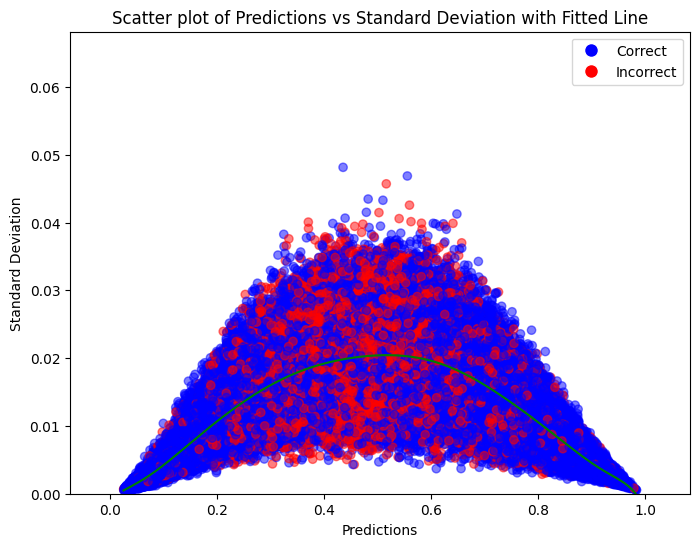

Mean Absolute Error (MAE): 0.04


In [ ]:
from sklearn.metrics import mean_absolute_error
scatter_plot(_preds, gauss_std*6, _labels, 12)  # Make sure you also provide the 'labels' list when calling the function
mae = mean_absolute_error(std, gauss_std*6.6)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

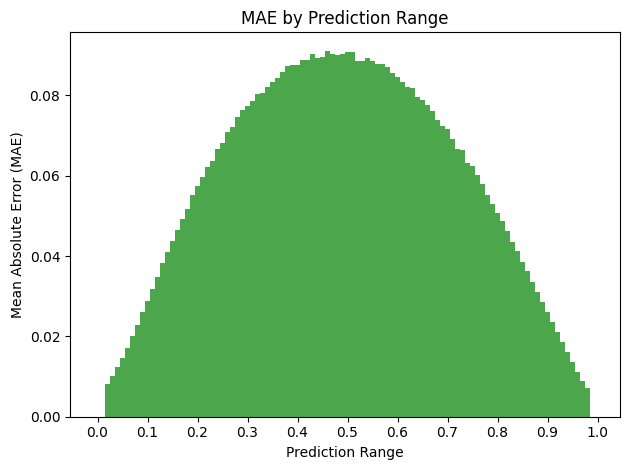

In [ ]:

def plot_mae_histogram(predictions, std_1, std_2, bin_size=0.05):
    # Grouping the predictions in bins
    bins = np.arange(0, 1 + bin_size, bin_size)
    bin_indices = np.digitize(predictions, bins) - 1
    
    abs_error_accumulator = np.zeros_like(bins[:-1])
    total_counts = np.zeros_like(bins[:-1])
    
    for pred, s1, s2 in zip(predictions, std_1, std_2):
        bin_index = min(int(pred / bin_size), len(bins) - 2)  # Ensure it's within range
        abs_error_accumulator[bin_index] += abs(s1 - s2)
        total_counts[bin_index] += 1
    
    # Calculating mean absolute error for each bin
    maes = np.divide(abs_error_accumulator, total_counts, out=np.zeros_like(abs_error_accumulator), where=total_counts!=0)
    
    # Plotting the histogram
    plt.bar(bins[:-1], maes, width=bin_size, alpha=0.7, color='green')
    plt.xlabel('Prediction Range')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('MAE by Prediction Range')
    
    # Set x-ticks every 0.1
    plt.xticks(np.arange(0, 1.1, 0.1))

    plt.tight_layout()
    plt.show()



plot_mae_histogram(_preds, std, gauss_std, bin_size=0.01)


In [ ]:
for i in range(50, 80):
    mae = mean_absolute_error(std, gauss_std*i/10)
    scaled_gauss=gauss_std*100
    scaled_squared=scaled_gauss*scaled_gauss/100
    mae_squared = mean_absolute_error(std, scaled_squared*i/10)
    print(f"Mean Absolute Error (MAE): {mae*100:.2f},  (MAE-S): {mae_squared*100:.2f},  (i): {i}")
    
    

Mean Absolute Error (MAE): 4.61,  (MAE-S): 5.28,  (i): 50
Mean Absolute Error (MAE): 4.59,  (MAE-S): 5.27,  (i): 51
Mean Absolute Error (MAE): 4.57,  (MAE-S): 5.27,  (i): 52
Mean Absolute Error (MAE): 4.55,  (MAE-S): 5.26,  (i): 53
Mean Absolute Error (MAE): 4.54,  (MAE-S): 5.26,  (i): 54
Mean Absolute Error (MAE): 4.52,  (MAE-S): 5.25,  (i): 55
Mean Absolute Error (MAE): 4.50,  (MAE-S): 5.25,  (i): 56
Mean Absolute Error (MAE): 4.48,  (MAE-S): 5.24,  (i): 57
Mean Absolute Error (MAE): 4.46,  (MAE-S): 5.24,  (i): 58
Mean Absolute Error (MAE): 4.45,  (MAE-S): 5.23,  (i): 59
Mean Absolute Error (MAE): 4.43,  (MAE-S): 5.23,  (i): 60
Mean Absolute Error (MAE): 4.41,  (MAE-S): 5.22,  (i): 61
Mean Absolute Error (MAE): 4.39,  (MAE-S): 5.22,  (i): 62
Mean Absolute Error (MAE): 4.37,  (MAE-S): 5.21,  (i): 63
Mean Absolute Error (MAE): 4.36,  (MAE-S): 5.21,  (i): 64
Mean Absolute Error (MAE): 4.34,  (MAE-S): 5.21,  (i): 65
Mean Absolute Error (MAE): 4.32,  (MAE-S): 5.20,  (i): 66
Mean Absolute 

In [ ]:
from torch.utils.data import Subset
threshold = 0.00
uncertainPredictionsIndices = np.where(std > threshold)[0]

print("uncertain predictions: ", uncertainPredictionsIndices.size, " out of ", std.size, ", ratio: ",(uncertainPredictionsIndices.size/std.size)*100,"%")
print("threshold: standard deviation > ", threshold)

uncertain_dataset = Subset(validation_dataset, uncertainPredictionsIndices)
uncertainDataLoader = torch.utils.data.DataLoader(uncertain_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

uncertain predictions:  125664  out of  125664 , ratio:  100.0 %
threshold: standard deviation >  0.0


In [ ]:
uncertainty_net = Net()
train(uncertainty_net, uncertainDataLoader)

epoch  0  done
epoch  1  done
epoch  2  done
epoch  3  done
epoch  4  done
epoch  5  done
epoch  6  done
epoch  7  done
epoch  8  done
epoch  9  done
Finished Training


In [ ]:
uncertainty_preds, uncertainty_preds_01, uncertainty_labels = predictOnData(uncertainty_net, testDataLoader)

Accuracy of the network on the test images: 50 %
(157080,) 0.758336067199707


In [ ]:
mean,std, mutual_info, dropout_predictions = get_monte_carlo_predictions(data_loader=testDataLoader,
                                forward_passes=100,
                                model=net,
                                n_classes=1,
                                n_samples=uncertainty_labels.size,)

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


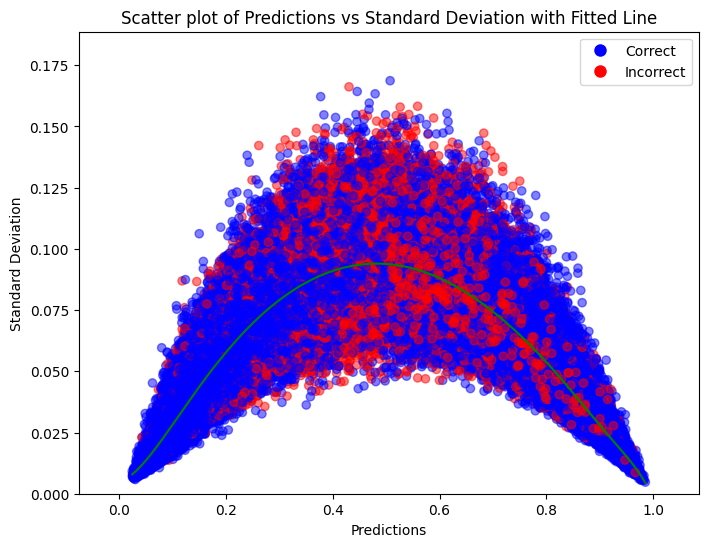

In [ ]:
#Monte Carlo on the test set
scatter_plot(test_preds, std, test_labels, 12)

In [ ]:
#Comparing the regular models performance on uncertain data and the model trained on uncertain data
from torch.utils.data import Subset
threshold = 0.06
uncertainPredictionsIndices = np.where(std > threshold)[0]

print("uncertain predictions: ", uncertainPredictionsIndices.size, " out of ", std.size, ", ratio: ",(uncertainPredictionsIndices.size/std.size)*100,"%")
print("threshold: standard deviation > ", threshold)

uncertain_test_dataset = Subset(test_dataset, uncertainPredictionsIndices)
uncertainTestDataLoader = torch.utils.data.DataLoader(uncertain_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

uncertain predictions:  66446  out of  157080 , ratio:  42.300738477209066 %
threshold: standard deviation >  0.06


In [ ]:
uncertainty_preds, uncertainty_preds_01, uncertainty_labels = predictOnData(uncertainty_net, uncertainTestDataLoader)

Accuracy of the network on the test images: 46 %
(66446,) 0.41456156969070435
